In [2]:
try:
    # load environment variables from .env file (requires `python-dotenv`)
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    pass

In [7]:
import os
from openai import OpenAI

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

# Play with some prompts

In [3]:
response = client.responses.create(
    model="gpt-4o-mini",
    input="Write a one-sentence bedtime story about a unicorn who has a frield with monkey.",
    temperature=0.2
)

print(response.output_text)

In a magical forest, a gentle unicorn named Luna and her playful monkey friend, Milo, spent their days swinging from rainbow vines and sharing secrets under the twinkling stars, dreaming of adventures yet to come.


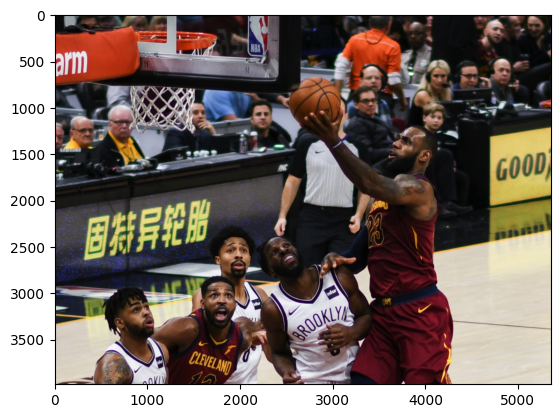

In [5]:
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

url = "https://upload.wikimedia.org/wikipedia/commons/3/3b/LeBron_James_Layup_%28Cleveland_vs_Brooklyn_2018%29.jpg"
url_response = urllib.request.urlopen(url)
image = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)
plt.imshow(image[..., ::-1])
plt.show()

In [4]:
# Just a single image take so muchhh tokens na.
response = client.responses.create(
    model="gpt-4o-mini",
    input=[
        {"role": "user", "content": "what teams are playing in this image?"},
        {
            "role": "user",
            "content": [
                {
                    "type": "input_image",
                    "image_url": "https://upload.wikimedia.org/wikipedia/commons/3/3b/LeBron_James_Layup_%28Cleveland_vs_Brooklyn_2018%29.jpg"
                }
            ]
        }
    ]
)

print(response.output_text)

The image features a basketball game between the Cleveland Cavaliers and the Brooklyn Nets.


In [9]:
stream = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "user",
            "content": "Say 'double bubble bath' ten times fast.",
        },
    ],
    stream=True,
)

for chunk in stream:
    print(chunk)
    print(chunk.choices[0].delta)
    print("****************")

ChatCompletionChunk(id='chatcmpl-BJYZxUZuXDb9XGnArdva0Ebxaxj6r', choices=[Choice(delta=ChoiceDelta(content='', function_call=None, refusal=None, role='assistant', tool_calls=None), finish_reason=None, index=0, logprobs=None)], created=1744000853, model='gpt-4o-2024-08-06', object='chat.completion.chunk', service_tier='default', system_fingerprint='fp_898ac29719', usage=None)
ChoiceDelta(content='', function_call=None, refusal=None, role='assistant', tool_calls=None)
****************
ChatCompletionChunk(id='chatcmpl-BJYZxUZuXDb9XGnArdva0Ebxaxj6r', choices=[Choice(delta=ChoiceDelta(content="That's", function_call=None, refusal=None, role=None, tool_calls=None), finish_reason=None, index=0, logprobs=None)], created=1744000853, model='gpt-4o-2024-08-06', object='chat.completion.chunk', service_tier='default', system_fingerprint='fp_898ac29719', usage=None)
ChoiceDelta(content="That's", function_call=None, refusal=None, role=None, tool_calls=None)
****************
ChatCompletionChunk(id='ch